# K-means Clustering Algorithm


In Unsupervised Learning the data is not labeled. Hence in order to learn from the data we need to organise the data into clusters. K-means Clustering Algorithm is an efficent algorithm to do this.

### Getting the Dataset
First let us import the dataset from Kaggle.

In [0]:
!mkdir ~/.kaggle
!cp /content/kaggle.json ~/.kaggle/kaggle.json

In [0]:
!chmod 600 /root/.kaggle/kaggle.json

In [15]:
!kaggle datasets download -d vjchoudhary7/customer-segmentation-tutorial-in-python

  0% 0.00/1.51k [00:00<?, ?B/s]
100% 1.51k/1.51k [00:00<00:00, 1.23MB/s]


In [16]:
!unzip *.zip

Archive:  customer-segmentation-tutorial-in-python.zip
  inflating: Mall_Customers.csv      


Here is a [link](https://www.kaggle.com/vjchoudhary7/customer-segmentation-tutorial-in-python) to the explanation of this dataset.

In [0]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.metrics.pairwise import pairwise_distances_argmin_min

### Exploring the Dataset
Let's explore the dataset.

In [18]:
data = pd.read_csv('/content/Mall_Customers.csv')
data.head()

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


Text(0, 0.5, 'Annual Income (k$)')

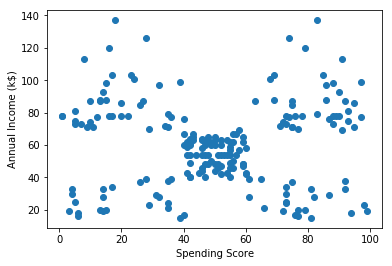

In [97]:
plt.scatter(data['Spending Score (1-100)'], data['Annual Income (k$)'])
plt.xlabel('Spending Score')
plt.ylabel('Annual Income (k$)')

We can observe that there are 5 clusters in the data. Now Let us use K-Means to predict those clusters. 

### K-means Clustering Algorithm

In [0]:
def Random_Initialisation(X, K):
  m = X.shape[0]
  rand_indices = np.random.randint(low=0,high=m,size=K, dtype='int')
  return X[rand_indices,:]

In [0]:
def K_means_Clustering(X, K, iterations):
  
  m = X.shape[0]
  c = np.zeros(m)
  u = Random_Initialisation(X, K)
  
  for i in range(iterations):
    #centroid assignment
    c = pairwise_distances_argmin_min(X, u)[0]
    #move centroid
    for i in range(K):
      ind = np.array(np.where(c == i)).ravel()
      x = X[ind,:]
      u[i] = np.mean(x, axis=0)

  return u,c

In [30]:
X_train = data[['Spending Score (1-100)','Annual Income (k$)']]
print(X_train.shape)

(200, 2)


### Deciding the Number of Clusters
Now in our dataset it is clear that there are 5 clusters. But there are situations that there can be ambuigity in deciding the number of clusters. In such situations we can use two methods.
  
  1.  Elbow method 
  2. Depending upon the purpose
 
First let us do the elbow method.

In [0]:
def Elbow_method(X, range_, itr):
  
  m= X.shape[0]
  cost = []
  J = 0
  for k in range_:
    u, c = K_means_Clustering(X, k, itr)
    for i in range(m):
      J += np.sum((X[i] - u[c[i]])**2)
    J = J/m
    cost.append(J)
    J = 0
  
  print(range_, cost)
  plt.plot(range_, cost)

[1, 2, 3, 4, 5, 6, 7] [1350.26, 919.095, 532.315, 369.705, 223.245, 194.31, 178.385]


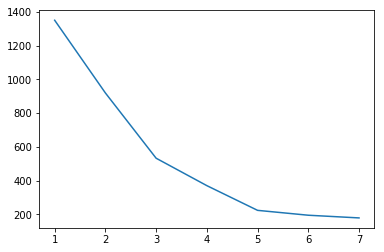

In [125]:
range_ = [1,2,3,4,5,6,7]
X = np.array(X_train.values)

Elbow_method(X, range_, 100)

Henc the ***Elbow method gives us the correct value of K = 5***. 

Now the elbow method does well in cases where there is a no ambuigity in the number of clusters. But if there is a less separation between different clusters, then it is better to decide the number of clusters depending upon your purpose of doing the clustering.


![Look at this image](https://docs.opencv.org/3.0-beta/_images/tshirt_grouped.jpg) 

Over here the number of clusters is ambiguos. So if we were a T-shirt company, depending upon our budget and our purpose, we would have decided K(no. of clusters) to be

  - K = 3 if we make T-shirt of sizes Small, Medium and Large.
  - K = 5 if we make Extra Small and Extra Large also.

### Clustered Data
Now let us see the clusters decided by our k-means algorithm.

In [104]:
itr = 100

u,c = K_means_Clustering(X, 5, itr)
print(u)

[[79 25]
 [82 86]
 [17 88]
 [49 55]
 [20 25]]


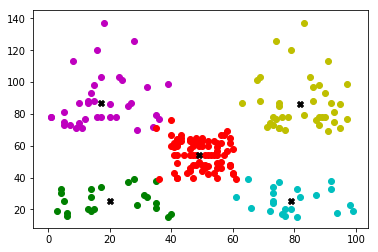

In [93]:
fig, ax = plt.subplots()

colors = {0:'c', 1:'g', 2:'m', 3:'r', 4:'y'}

for i in range(5):
  cluster_1 = np.where(c==i)
  ax.scatter(X[cluster_1,0],X[cluster_1,1],color=colors[i])

ax.scatter(u[:,0],u[:,1], color='k', marker='X')

Hence our K-means algorithm performs well and clusters the given data into 5 clusters.